# Integer Arithmetic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

# Disable the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
def calculate_merged_df(nlimbs):
    """
    Calculates a dataframe of the following format for a given value of NLIMBS:

    | NLIMBS | Function | CT | SCT | Performance Overhead (%) |
    |--------|----------|----|-----|--------------------------|
    | ...    | ...      | ...| ... | ...                      |
    
    Parameters:
    - nlimbs (int): The value of NLIMBS for which to calculate the dataframe.
    
    Returns:
    - df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT, SCT,
                             and Performance Overhead (%) columns.
    """
    
    df_sct = pd.read_csv(f'../data/sct/bn/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_sct['Function'] = df_sct['Function'].str.replace('.csv', '')
    
    df_ct = pd.read_csv(f'../data/ct/bn/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_ct['Function'] = df_ct['Function'].str.replace('.csv', '')
    
    # Merge the dataframes on the 'Function' column
    merged_df = df_sct.merge(df_ct, on='Function')
    
    # Calculate the performance overhead as a percentage
    merged_df['Performance Overhead (%)'] = ((merged_df['SCT'] - merged_df['CT']) / merged_df['CT']) * 100
    
    # Round the performance overhead to two decimal places
    merged_df['Performance Overhead (%)'] = merged_df['Performance Overhead (%)'].round(2)
    
    # Add an 'NLIMBS' column
    merged_df = merged_df.assign(NLIMBS=nlimbs)
    
    # Reorder the columns
    merged_df = merged_df[['NLIMBS', 'Function', 'CT', 'SCT', 'Performance Overhead (%)']]
    
    return merged_df

In [4]:
def plot_merged_df(df):
    """
    Plots the CT and SCT bars for each Function in the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the NLIMBS, Function, CT, SCT
                             and Performance Overhead (%) columns.

    Returns:
    None
    """
        
    nlimbs = df['NLIMBS'][0]
    
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Set the width of each bar
    bar_width = 0.35

    # Generate the index for the x-axis ticks
    x_ticks = np.arange(len(df))
    
    # Create a bar plot for CT
    plt.bar(x_ticks, df['CT'], width=bar_width, label='CT')

    # Create a bar plot for SCT
    plt.bar(x_ticks + bar_width, df['SCT'], width=bar_width, label='SCT')

    # Set the x-axis ticks and labels
    plt.xticks(x_ticks + bar_width/2, df['Function'])

    # Set the labels and title
    plt.xlabel('Function')
    plt.ylabel('Clock Cyles')
    plt.title(f'CT & SCT comparison for {nlimbs} Limbs')
    plt.legend()

    # Show the plot
    plt.show()

In [5]:
def get_function_df(df_list, function):
    """
    Computes a dataframe with NLIMBS, CT and SCT for a given Function from a list of dataframes.

    Parameters:
    - df_list (list): A list of pandas dataframes containing the required data.
    - function (str): The Function value to filter the dataframes.

    Returns:
    - merged_df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT and SCT columns.
    """
    
    merged_df = pd.DataFrame()
    for df in df_list:
        filtered_df = df[df['Function'].str.startswith(function)]
        merged_df = merged_df.append(filtered_df, ignore_index=True)
        
        # Drop the 'Performance Overhead (%)' column
        merged_df = merged_df.drop('Performance Overhead (%)', axis=1)

        # Add a 'Delta' column
        # merged_df['Delta'] = merged_df['SCT'] - merged_df['CT']
    return merged_df

In [6]:
def plot_function_df(df, function):
    """
    Plots the performance comparison of CT and SCT for a specific Function from the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the performance data.
    - function (str): The Function value for which to plot the performance comparison.

    Returns:
    None
    """
    
    # Create a figure and axes objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax = df.plot(x='NLIMBS', y=['SCT', 'CT'], ax=ax)
    ax.set_ylabel('Clock Cyles')
    ax.set_title(f'{function} performance comparison')
    
    # Set the legend in the upper right corner
    ax.legend(loc='upper right')
    
    plt.show()

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,1,bn_addn,40,80,100.0
1,1,bn_copy,40,80,100.0
2,1,bn_eq,40,80,100.0
3,1,bn_muln,40,80,100.0
4,1,bn_set0,40,80,100.0
5,1,bn_sqrn,40,80,100.0
6,1,bn_subn,40,80,100.0
7,1,bn_test0,40,80,100.0


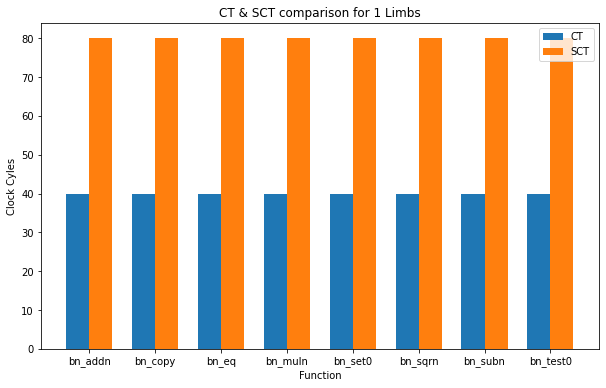

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,2,bn_addn,40,80,100.0
1,2,bn_copy,40,80,100.0
2,2,bn_eq,40,100,150.0
3,2,bn_muln,40,100,150.0
4,2,bn_set0,40,80,100.0
5,2,bn_sqrn,40,100,150.0
6,2,bn_subn,40,80,100.0
7,2,bn_test0,40,80,100.0


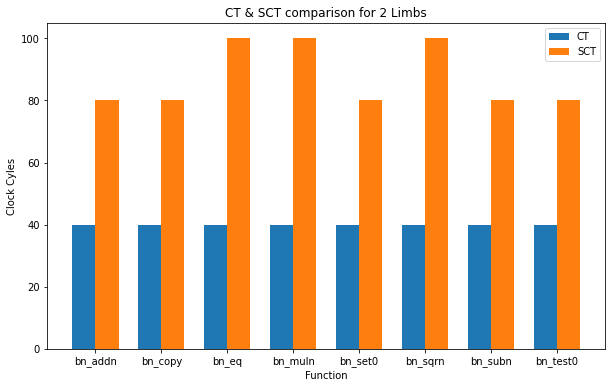

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,3,bn_addn,40,80,100.00
1,3,bn_copy,40,80,100.00
2,3,bn_eq,40,80,100.00
3,3,bn_muln,60,100,66.67
4,3,bn_set0,40,80,100.00
5,3,bn_sqrn,60,100,66.67
6,3,bn_subn,40,80,100.00
7,3,bn_test0,40,80,100.00


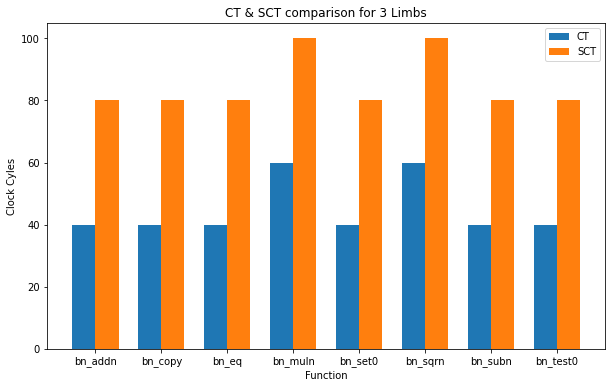

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,4,bn_addn,40,100,150.0
1,4,bn_copy,40,80,100.0
2,4,bn_eq,40,80,100.0
3,4,bn_muln,80,120,50.0
4,4,bn_set0,40,80,100.0
5,4,bn_sqrn,80,120,50.0
6,4,bn_subn,40,100,150.0
7,4,bn_test0,40,80,100.0


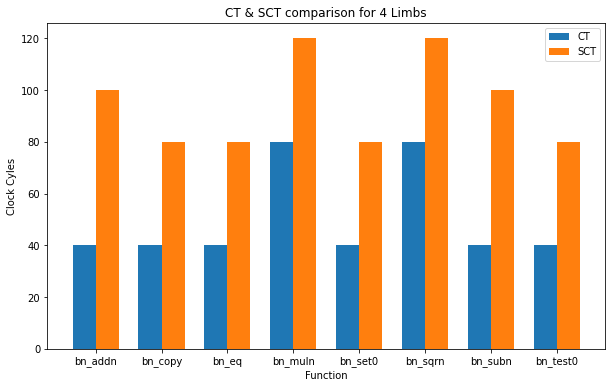

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,5,bn_addn,40,100,150.0
1,5,bn_copy,40,80,100.0
2,5,bn_eq,40,80,100.0
3,5,bn_muln,100,140,40.0
4,5,bn_set0,40,80,100.0
5,5,bn_sqrn,100,140,40.0
6,5,bn_subn,40,100,150.0
7,5,bn_test0,40,80,100.0


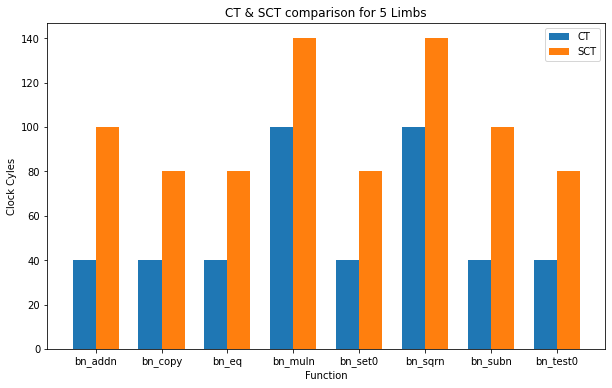

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,6,bn_addn,40,100,150.00
1,6,bn_copy,40,80,100.00
2,6,bn_eq,40,100,150.00
3,6,bn_muln,120,180,50.00
4,6,bn_set0,40,80,100.00
5,6,bn_sqrn,140,180,28.57
6,6,bn_subn,40,100,150.00
7,6,bn_test0,40,80,100.00


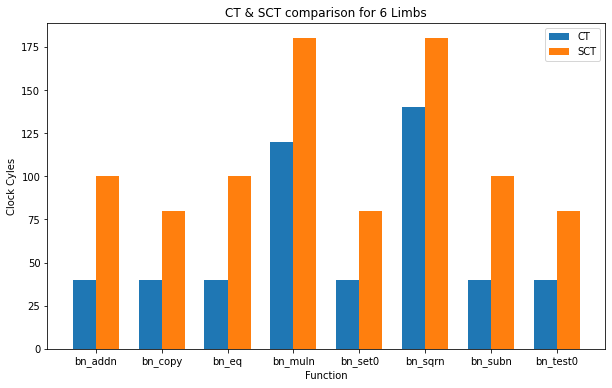

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,7,bn_addn,40,100,150.00
1,7,bn_copy,40,80,100.00
2,7,bn_eq,40,100,150.00
3,7,bn_muln,140,200,42.86
4,7,bn_set0,40,80,100.00
5,7,bn_sqrn,160,220,37.50
6,7,bn_subn,40,100,150.00
7,7,bn_test0,40,80,100.00


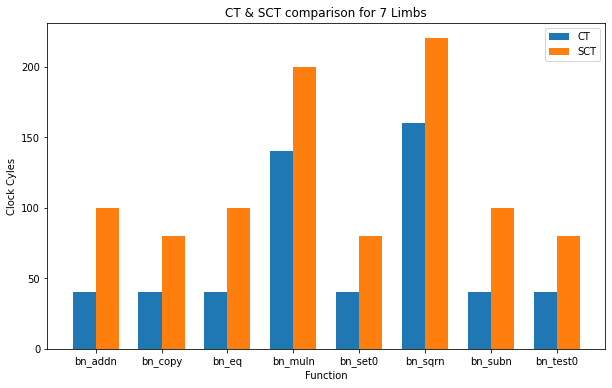

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,8,bn_addn,60,100,66.67
1,8,bn_copy,40,80,100.00
2,8,bn_eq,40,100,150.00
3,8,bn_muln,180,240,33.33
4,8,bn_set0,40,80,100.00
5,8,bn_sqrn,200,240,20.00
6,8,bn_subn,60,100,66.67
7,8,bn_test0,40,80,100.00


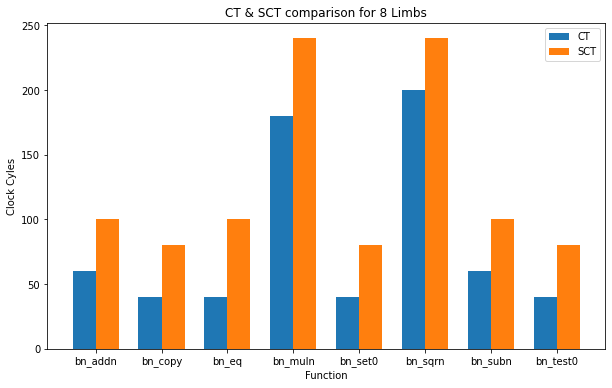

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,9,bn_addn,60,100,66.67
1,9,bn_copy,40,80,100.00
2,9,bn_eq,40,100,150.00
3,9,bn_muln,220,260,18.18
4,9,bn_set0,40,80,100.00
5,9,bn_sqrn,240,280,16.67
6,9,bn_subn,60,100,66.67
7,9,bn_test0,40,80,100.00


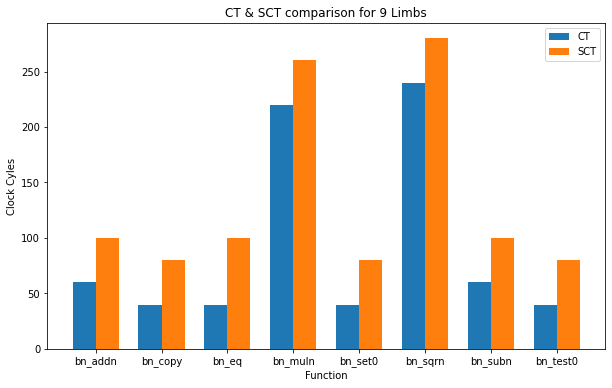

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,10,bn_addn,60,100,66.67
1,10,bn_copy,40,80,100.00
2,10,bn_eq,40,100,150.00
3,10,bn_muln,260,320,23.08
4,10,bn_set0,40,80,100.00
5,10,bn_sqrn,300,340,13.33
6,10,bn_subn,60,100,66.67
7,10,bn_test0,40,80,100.00


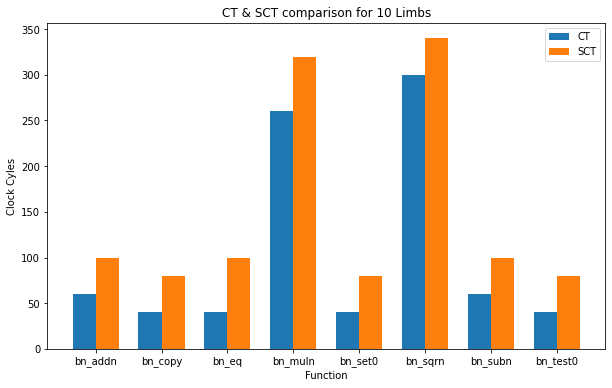

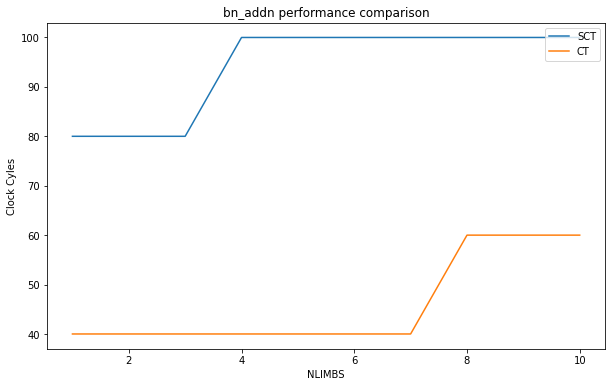

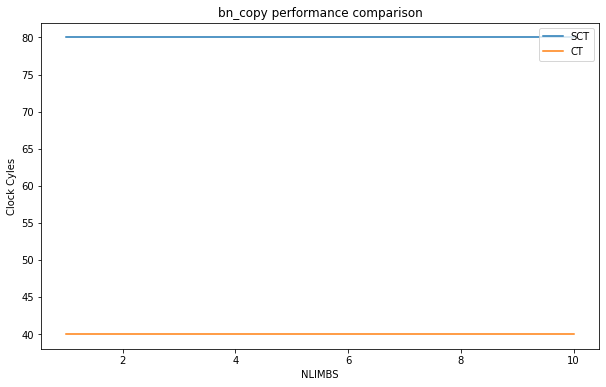

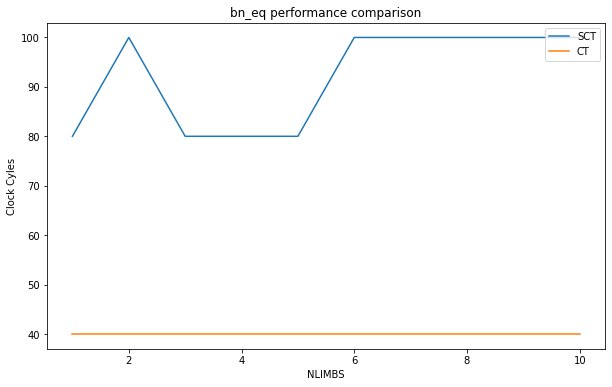

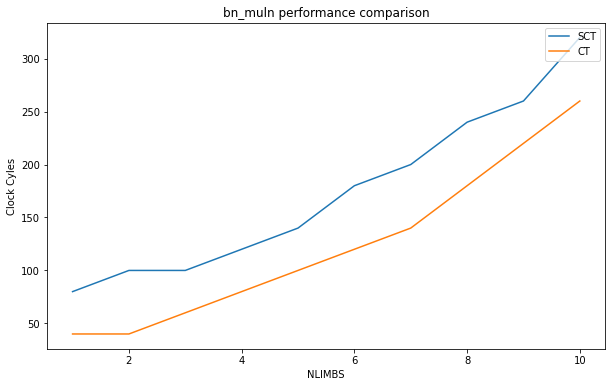

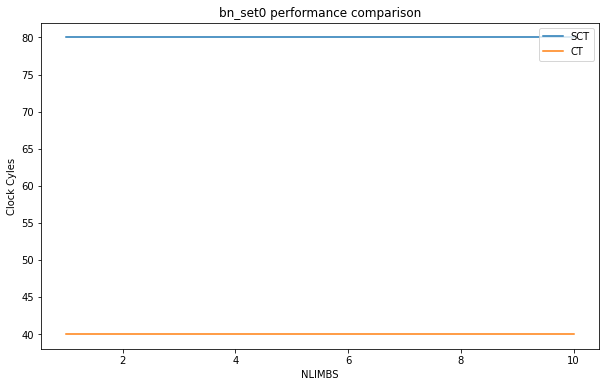

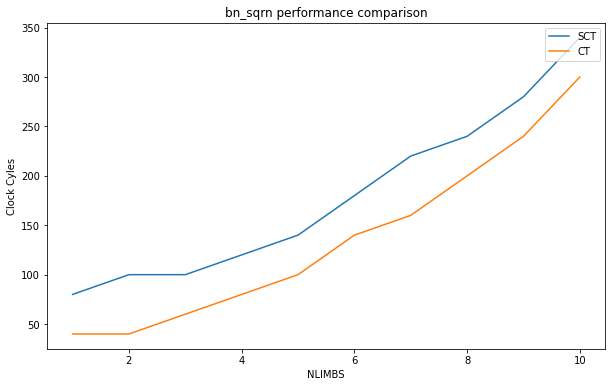

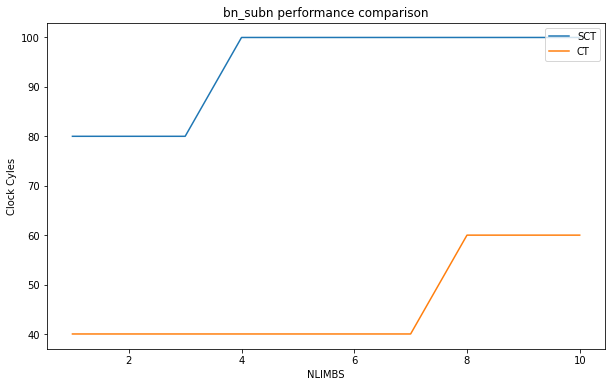

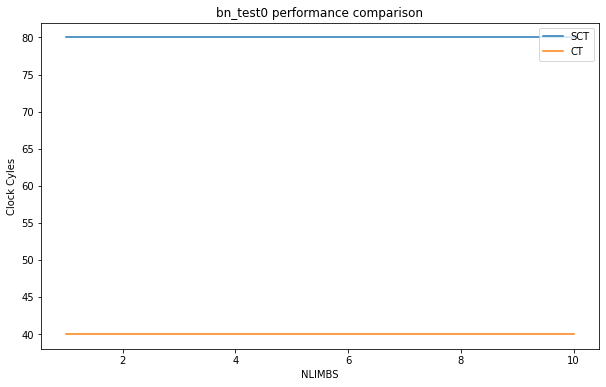

In [7]:
# Plot all data at once

MIN_LIMBS = 1
MAX_LIMBS = 10

merged_df_list = []
functions = ['bn_addn', 'bn_copy', 'bn_eq', 'bn_muln', 'bn_set0', 'bn_sqrn', 'bn_subn', 'bn_test0']

for i in range(MIN_LIMBS, MAX_LIMBS + 1):
    df = calculate_merged_df(i)
    merged_df_list.append(df)
    display(df)
    plot_merged_df(df)
    
for f in functions:
    df = get_function_df(merged_df_list, f)
    plot_function_df(df, f)